In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('../datasets/RIASEC_Dataset_clustered.csv')
X = df.drop(columns=['major_cluster'])
y = df['major_cluster']

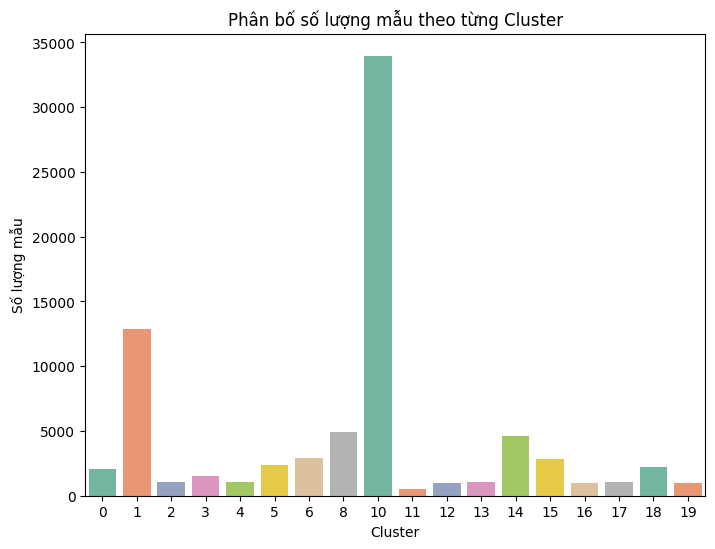

Số lượng mẫu mỗi cluster:
major_cluster
0      2077
1     12855
2      1059
3      1554
4      1021
5      2334
6      2936
8      4925
10    33969
11      490
12      948
13     1032
14     4594
15     2829
16      975
17     1076
18     2225
19     1001
Name: count, dtype: int64


In [3]:
plt.figure(figsize=(8, 6))
sns.countplot(x='major_cluster', hue='major_cluster', data=df, palette='Set2', legend=False)
plt.title("Phân bố số lượng mẫu theo từng Cluster")
plt.xlabel("Cluster")
plt.ylabel("Số lượng mẫu")
plt.show()

print("Số lượng mẫu mỗi cluster:")
print(df['major_cluster'].value_counts().sort_index())

In [4]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

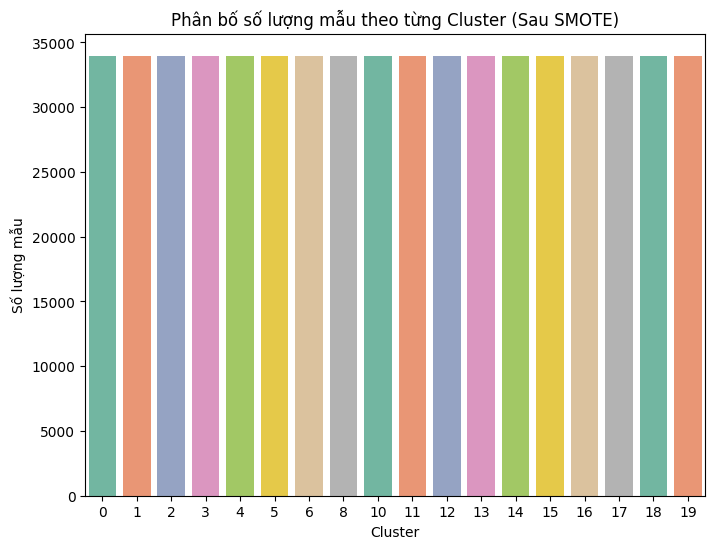

Số lượng mẫu mỗi cluster sau SMOTE:
major_cluster
0     33969
1     33969
2     33969
3     33969
4     33969
5     33969
6     33969
8     33969
10    33969
11    33969
12    33969
13    33969
14    33969
15    33969
16    33969
17    33969
18    33969
19    33969
Name: count, dtype: int64


In [5]:
df_res = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.Series(y_res, name='major_cluster')], axis=1)

plt.figure(figsize=(8, 6))
sns.countplot(x='major_cluster', hue='major_cluster', data=df_res, palette='Set2', dodge=False, legend=False)
plt.title("Phân bố số lượng mẫu theo từng Cluster (Sau SMOTE)")
plt.xlabel("Cluster")
plt.ylabel("Số lượng mẫu")
plt.show()

print("Số lượng mẫu mỗi cluster sau SMOTE:")
print(y_res.value_counts().sort_index())

In [6]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state=42))
])


=== Fold 1 ===
Macro F1-score: 0.7862
Classification report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      6794
           1       0.52      0.40      0.45      6794
           2       0.87      0.93      0.90      6794
           3       0.81      0.87      0.84      6794
           4       0.86      0.93      0.89      6794
           5       0.79      0.82      0.80      6793
           6       0.76      0.75      0.75      6793
           8       0.72      0.65      0.69      6794
          10       0.31      0.19      0.24      6794
          11       0.94      0.98      0.96      6794
          12       0.89      0.95      0.92      6794
          13       0.87      0.93      0.90      6794
          14       0.68      0.64      0.66      6794
          15       0.76      0.76      0.76      6794
          16       0.88      0.94      0.91      6793
          17       0.87      0.93      0.90      6794
          18       

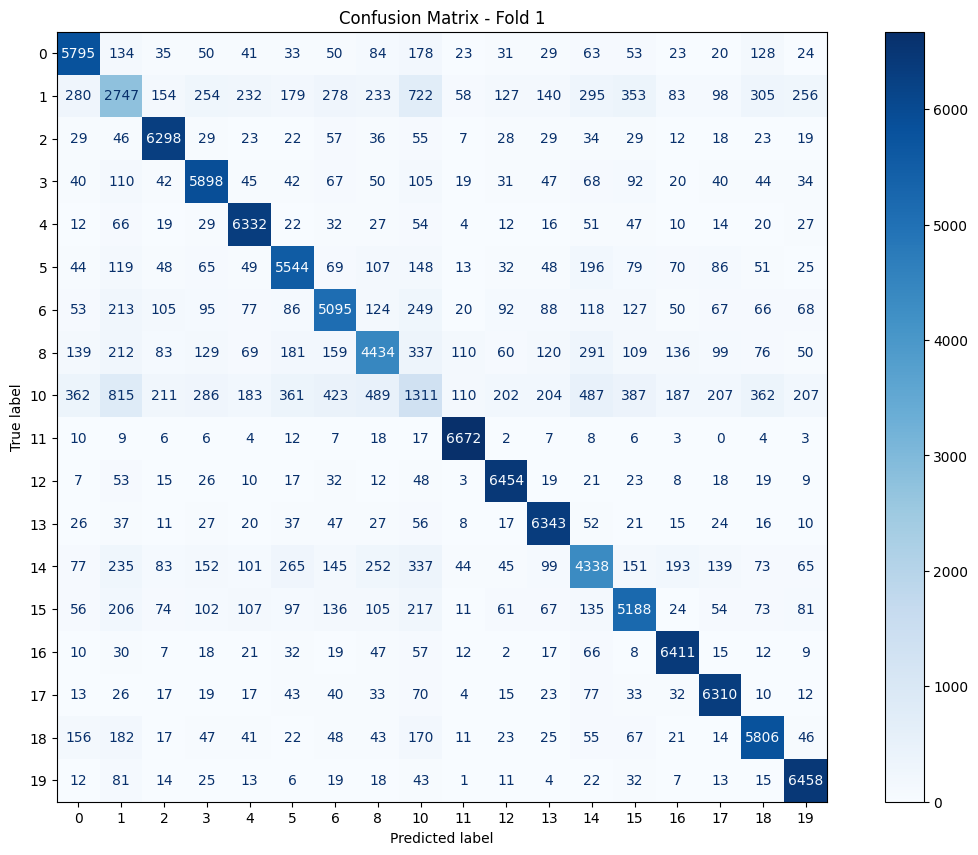


=== Fold 2 ===
Macro F1-score: 0.7893
Classification report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      6794
           1       0.51      0.41      0.45      6794
           2       0.88      0.93      0.91      6794
           3       0.82      0.88      0.85      6793
           4       0.87      0.94      0.90      6794
           5       0.80      0.82      0.81      6794
           6       0.76      0.76      0.76      6794
           8       0.72      0.66      0.69      6794
          10       0.31      0.19      0.24      6794
          11       0.94      0.98      0.96      6794
          12       0.90      0.95      0.92      6794
          13       0.87      0.94      0.90      6794
          14       0.69      0.64      0.66      6793
          15       0.76      0.76      0.76      6794
          16       0.88      0.94      0.91      6794
          17       0.86      0.93      0.90      6794
          18       

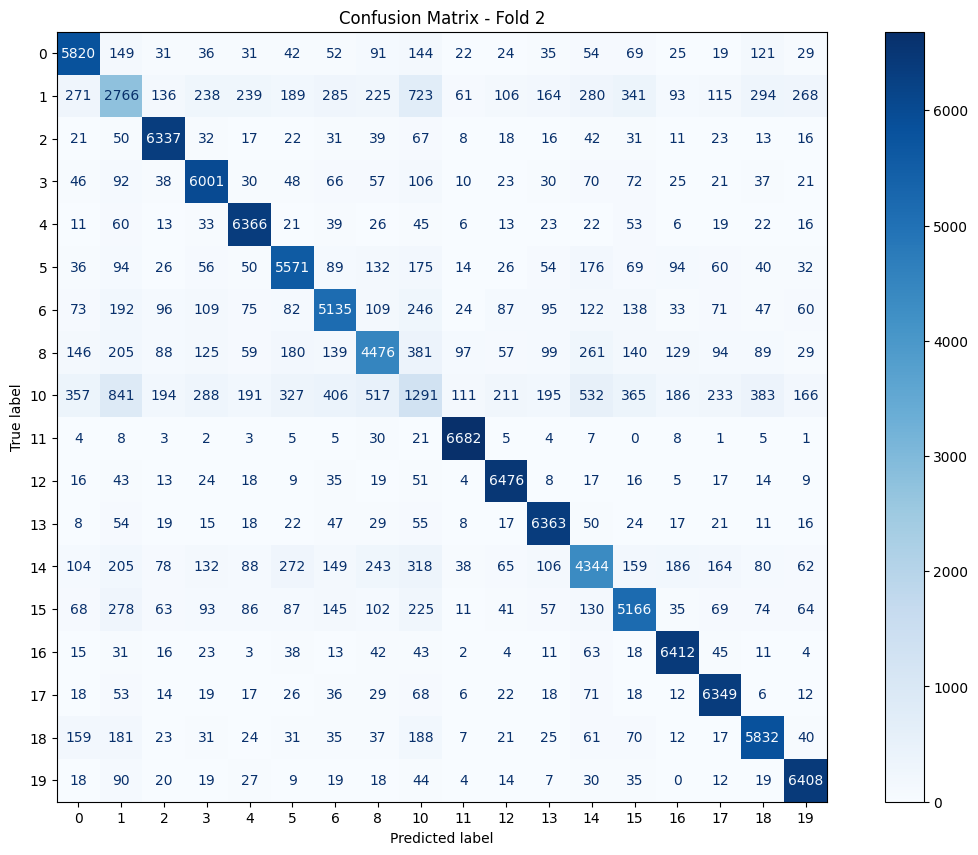


=== Fold 3 ===
Macro F1-score: 0.7859
Classification report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      6794
           1       0.50      0.39      0.44      6794
           2       0.87      0.94      0.90      6793
           3       0.82      0.88      0.85      6794
           4       0.87      0.94      0.90      6793
           5       0.79      0.81      0.80      6794
           6       0.76      0.75      0.75      6794
           8       0.73      0.66      0.69      6794
          10       0.30      0.18      0.23      6793
          11       0.94      0.98      0.96      6794
          12       0.89      0.95      0.92      6794
          13       0.87      0.93      0.90      6794
          14       0.68      0.64      0.66      6794
          15       0.74      0.76      0.75      6794
          16       0.89      0.94      0.91      6794
          17       0.87      0.93      0.90      6793
          18       

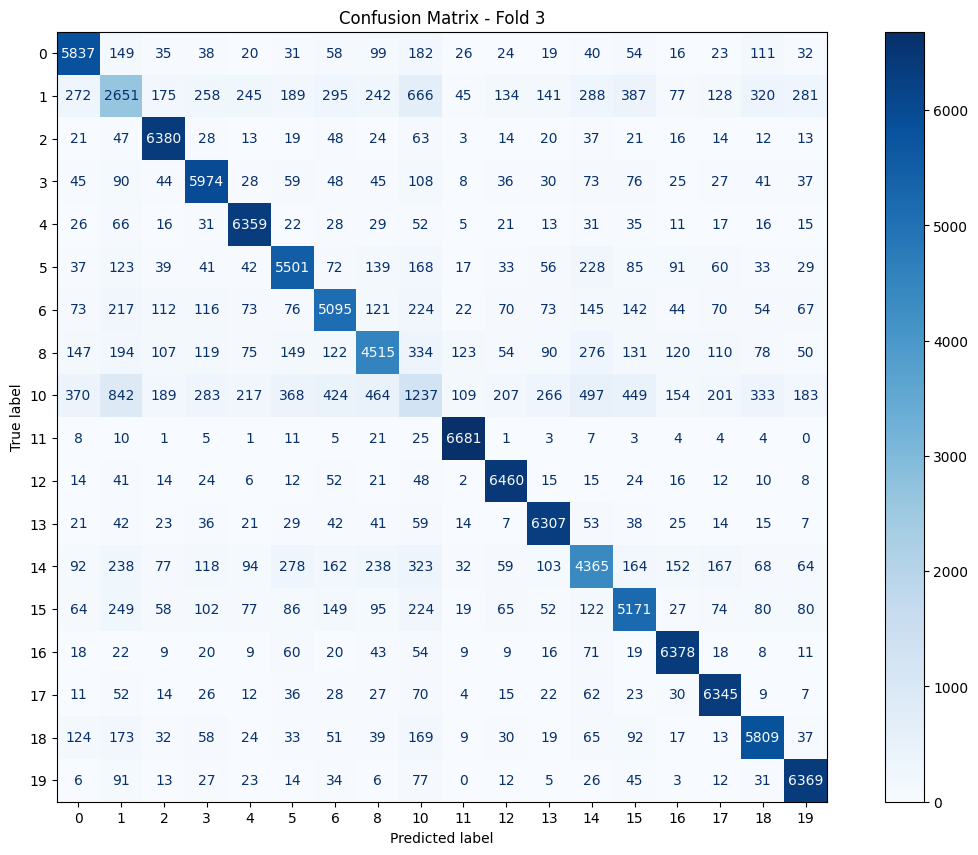


=== Fold 4 ===
Macro F1-score: 0.7862
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      6794
           1       0.51      0.39      0.44      6794
           2       0.87      0.93      0.90      6794
           3       0.82      0.88      0.85      6794
           4       0.85      0.93      0.89      6794
           5       0.78      0.80      0.79      6794
           6       0.75      0.76      0.75      6794
           8       0.72      0.66      0.69      6793
          10       0.32      0.19      0.24      6794
          11       0.93      0.98      0.96      6793
          12       0.89      0.95      0.92      6793
          13       0.86      0.93      0.89      6794
          14       0.68      0.63      0.65      6794
          15       0.75      0.77      0.76      6793
          16       0.88      0.95      0.91      6794
          17       0.87      0.93      0.90      6794
          18       

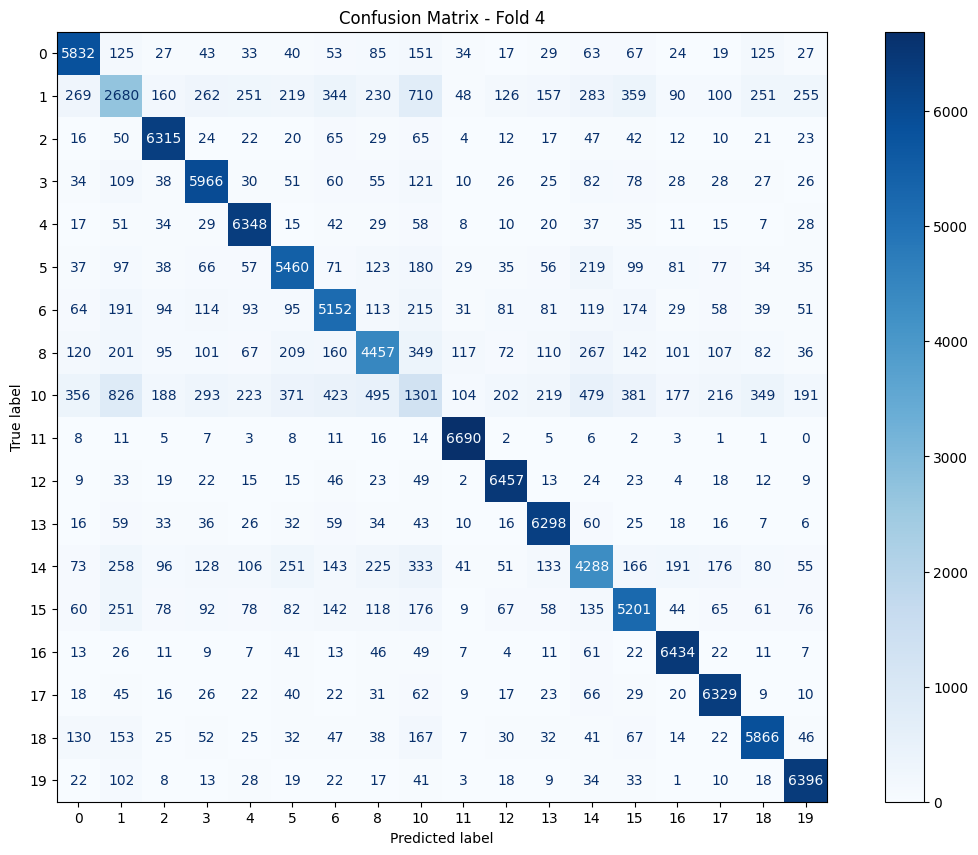


=== Fold 5 ===
Macro F1-score: 0.7867
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      6793
           1       0.50      0.39      0.44      6793
           2       0.86      0.93      0.89      6794
           3       0.82      0.88      0.85      6794
           4       0.86      0.93      0.89      6794
           5       0.78      0.81      0.80      6794
           6       0.76      0.75      0.76      6794
           8       0.73      0.65      0.69      6794
          10       0.32      0.20      0.24      6794
          11       0.94      0.98      0.96      6794
          12       0.90      0.95      0.92      6794
          13       0.86      0.93      0.90      6793
          14       0.69      0.64      0.66      6794
          15       0.75      0.77      0.76      6794
          16       0.88      0.95      0.91      6794
          17       0.87      0.93      0.90      6794
          18       

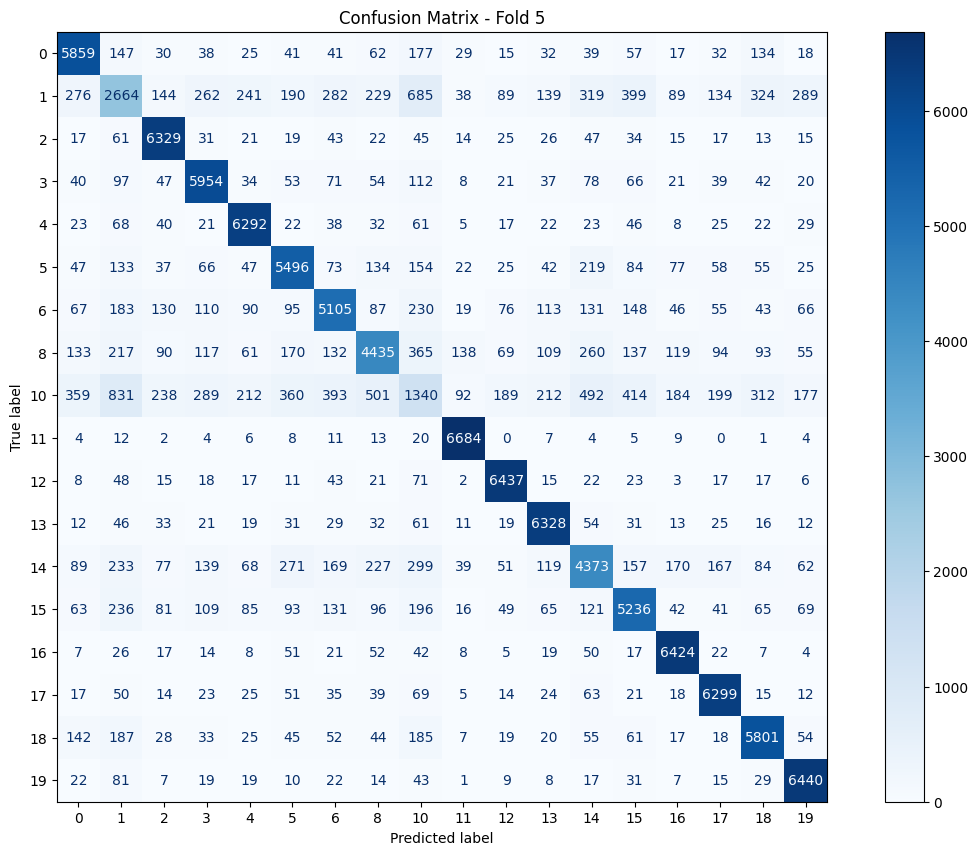

In [7]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []
fold = 1

for train_index, test_index in kf.split(X_res, y_res):
    X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
    y_train, y_test = y_res.iloc[train_index], y_res.iloc[test_index]
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    # y_proba = pipeline.predict_proba(X_test)  
    
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores.append(f1)
    
    print(f"\n=== Fold {fold} ===")
    print(f"Macro F1-score: {f1:.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    
    clf = pipeline.named_steps['clf']
    n_leaves = clf.get_n_leaves()            
    n_nodes = clf.tree_.node_count             
    n_branches = n_nodes - n_leaves             
    max_depth = clf.tree_.max_depth          
    print(f"Branches: {n_branches}, Leaves: {n_leaves}, Max Depth: {max_depth}")
    
    labels = sorted([c for c in set(y_test) | set(y_pred) if c not in [7, 9]])
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(15, 10)) 
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', values_format='d', ax=plt.gca()) 
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.show()
    
    fold += 1


In [8]:
print("\n=== K-Fold Results ===")
print(f"Mean Macro F1-score: {sum(f1_scores)/len(f1_scores):.4f}")
print(f"Std Macro F1-score: {pd.Series(f1_scores).std():.4f}")


=== K-Fold Results ===
Mean Macro F1-score: 0.7868
Std Macro F1-score: 0.0014


In [9]:
print("Số nút:", n_nodes)
print("Số lá:", n_leaves)

Số nút: 210119
Số lá: 105060
